In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import svm
!pip install pyod
import pyod

     |████████████████████████████████| 102kB 2.6MB/s 
     |████████████████████████████████| 2.1MB 8.2MB/s 
  Created wheel for pyod: filename=pyod-0.8.1-cp36-none-any.whl size=105653 sha256=17640ec30c8ee1b7f43975758d7cc357314b85ce74b4717a33b59e64f16c7c08
  Stored in directory: /root/.cache/pip/wheels/2e/ca/18/727e9d98a41f5f4385a97d5b429f3a9c8fbee13f9780c18642
  Created wheel for combo: filename=combo-0.1.1-cp36-none-any.whl size=42111 sha256=708283de1c6b7b3ebedb8db55882b3bca883fe6101bd1b1fce6fa3eca901e532
  Stored in directory: /root/.cache/pip/wheels/55/ec/e5/a2331372c676c467e70c6646e646edf6997d5c4905b8c0f5e6
  Created wheel for suod: filename=suod-0.0.4-cp36-none-any.whl size=2167157 sha256=ddc3f69599d1dd8aa7cb25695e25d1322cde63f8c93424288f577ecc8e3d0d19
  Stored in directory: /root/.cache/pip/wheels/57/55/e5/a4fca65bba231f6d0115059b589148774b41faea25b3f2aa27
Successfully built pyod combo suod


In [ ]:
# READ DATAFRAME
x = pd.read_pickle('/content/drive/My Drive/pickled_dataset/Immagini/x.pkl')
y = pd.read_pickle('/content/drive/My Drive/pickled_dataset/Immagini/y.pkl')
x = x/255

In [ ]:
# SAVE DATAFRAME
x.to_pickle('/content/drive/My Drive/pickled_dataset/Immagini/x.pkl')
y.to_pickle('/content/drive/My Drive/pickled_dataset/Immagini/y.pkl')

In [ ]:
mask = y == 1 
x_train = x[mask]
x_test = x[mask == False]
x_train.shape[0]+x_test.shape[0]

5976

In [ ]:
y_test = np.ones(x_test.shape[0])
y_train = np.zeros(x_train.shape[0])

In [ ]:
from sklearn.metrics import roc_curve, auc
def plot_roc_curve(name, plotted_class, scores):
  y_true = np.ones(x.shape[0])
  y_true[x_train.shape[0]:]=-1
  print(scores.shape,y_true.shape)
  # Compute ROC curve and ROC area for each class
  fpr = dict()
  tpr = dict()
  roc_auc = dict()
  for i in range(2):
      fpr[i], tpr[i], _ = roc_curve(y_true,scores)
      roc_auc[i] = auc(fpr[i], tpr[i])

  # Compute micro-average ROC curve and ROC area
  fpr["micro"], tpr["micro"], _ = roc_curve(y_true.ravel(), scores.ravel())
  roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])
  plt.figure()
  lw = 1 
  plt.plot(fpr[plotted_class], tpr[plotted_class], color='darkorange',
          lw=lw, label='ROC curve (area = %0.2f)' % roc_auc[plotted_class])
  plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
  plt.xlim([0.0, 1.0])
  plt.ylim([0.0, 1.05])
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.title(name)
  plt.legend(loc="lower right")
  plt.show()

In [ ]:
kernels = ['linear', 'poly', 'rbf', 'sigmoid', 'precomputed']
clf = svm.OneClassSVM(degree=5, kernel="poly", gamma='scale')
clf.fit(x_train)
scores = clf.decision_function(pd.concat([x_train,x_test]))


(5976,) (5976,)


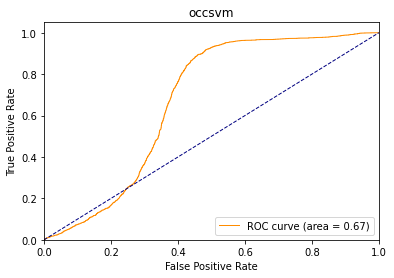

In [ ]:
plot_roc_curve("occsvm", 0, scores)

In [ ]:
import pickle
name = "occsvm"
filename = '/content/drive/My Drive/ModelliSalvati/Immagini/outlier/'+name+'.sav'
pickle.dump(clf, open(filename, 'wb'))

(5976,) (5976,)


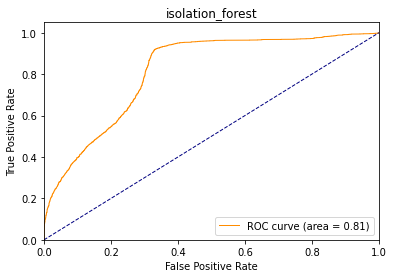

In [ ]:
from sklearn.ensemble import IsolationForest
clf = IsolationForest(random_state=0,n_estimators=1000,max_samples=0.4,contamination=0).fit(x_train)
scores = clf.decision_function(pd.concat([x_train,x_test]))
plot_roc_curve("isolation_forest", 0, scores) # 0.82

In [ ]:
import pickle
name = "isolationforest"
filename = '/content/drive/My Drive/ModelliSalvati/Immagini/outlier/'+name+'.sav'
pickle.dump(clf, open(filename, 'wb'))

In [ ]:
from pyod.models.knn import KNN

# train kNN detector
clf_name = 'KNN'
clf = KNN(method='mean',n_neighbors=2)
clf.fit(x_train)

# get the prediction labels and outlier scores of the training data
y_train_pred = clf.labels_  # binary labels (0: inliers, 1: outliers)
y_train_scores = clf.decision_scores_  # raw outlier scores

# get the prediction on the test data
y_test_pred = clf.predict(x_test)  # outlier labels (0 or 1)
y_test_scores = clf.decision_function(x_test)  # outlier scores

In [ ]:
import pyod

# evaluate and print the results
print("\nOn Training Data:")
pyod.utils.data.evaluate_print(clf_name, np.concatenate((y_train,y_test)), np.concatenate((y_train_scores,y_test_scores)))
print("\nOn Test Data:")
# pyod.utils.data.evaluate_print(clf_name, y_test, y_test_scores)


On Training Data:
KNN ROC:0.8564, precision @ rank n:0.7945

On Test Data:


In [ ]:
import pickle
name = "KNN"
filename = '/content/drive/My Drive/ModelliSalvati/Immagini/outlier/'+name+'.sav'
pickle.dump(clf, open(filename, 'wb'))

In [ ]:
# mean : 0.846 <- best 
#    neigh 3 : 0.85
# median: 0.840
